## Выявление характеристик, определяющие успешность игры 

### Описание проекта - основная задача

Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.
Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й.

### План проекта

[Шаг 1. Открываем файл с данными и изучаем общую информацию](#step1)  
- Импортировать файлы с исходными данными

[Шаг 2 Изучите и проверьте данные](#step2)  
- Замените названия столбцов (приведите к нижнему регистру);
- Преобразуйте данные в нужные типы. Опишите, в каких столбцах заменили тип данных и почему;
- Обработайте пропуски при необходимости:
- Обратите внимание на аббревиатуру 'tbd' в столбцах с рейтингом. Отдельно разберите это значение и опишите, как его обработать;
- Посчитайте суммарные продажи во всех регионах и запишите их в отдельный столбец.

[Шаг 3 Проведите исследовательский анализ данных](#step3)  
- Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?
- Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?
- Возьмите данные за соответствующий актуальный период. Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.
- Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.
- Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат.
- Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.
- Соотнесите выводы с продажами игр на других платформах.
- Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

[Шаг 4. Составьте портрет пользователя каждого региона](#step4)  
Определите для пользователя каждого региона (NA, EU, JP):
- Самые популярные платформы (топ-5). Опишите различия в долях продаж.
- Самые популярные жанры (топ-5). Поясните разницу.
- Влияет ли рейтинг ESRB на продажи в отдельном регионе?

[Шаг 5. Проверьте гипотезы](#step5)  
- Гипотеза1: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
- Гипотеза2: Средние пользовательские рейтинги жанров Action и Sports разные.

[Шаг 6. Сделайте общий вывод](#step5)
- Написать общий вывод по проведенному исследованию.

### Шаг 1. Открываем файл с данными и изучаем общую информацию <a id="step1"></a>  

In [2]:
import pandas as pd
import math
import matplotlib.pyplot as plt 
import numpy as np
from scipy import stats as st
from scipy.stats import levene
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

data = pd.read_csv('/datasets/games.csv')

display(data.describe()) # изучение каждого датасета с помощью метода describe
display(data.info()) # проверим типы данных и посмотрим наличие пропущенных значений
print ('Дубликатов в данных:', data.duplicated().sum()) # проверяем дубликаты
print(data.head())

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


None

Дубликатов в данных: 0
                       Name Platform  Year_of_Release         Genre  NA_sales  \
0                Wii Sports      Wii           2006.0        Sports     41.36   
1         Super Mario Bros.      NES           1985.0      Platform     29.08   
2            Mario Kart Wii      Wii           2008.0        Racing     15.68   
3         Wii Sports Resort      Wii           2009.0        Sports     15.61   
4  Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing     11.27   

   EU_sales  JP_sales  Other_sales  Critic_Score User_Score Rating  
0     28.96      3.77         8.45          76.0          8      E  
1      3.58      6.81         0.77           NaN        NaN    NaN  
2     12.76      3.79         3.29          82.0        8.3      E  
3     10.93      3.28         2.95          80.0          8      E  
4      8.89     10.22         1.00           NaN        NaN    NaN  


### Вывод

- Обнаружили пропущенные значения в столбцах Name, Year_of_Release, Genre, Critic_Score, User_Score и Rating
- Проверили типы данных. Нужно заменить тип для столбцов Year_of_Release и Critic_Score так после проверки не нашли там дробных значений
- В столбце User_Score есть значение tbd с количеством повторений 2424 раз, после обработки тоже тип нужно поменять
- Проверили данные на наличие дубликатов - дубликаты не обнаружены

### Шаг 2. Изучите и проверьте данные <a id="step2"></a>  

In [1]:
data.columns = map(str.lower, data.columns) # приводим столбцы к нижнему регистру

display(data[data['year_of_release'].isna()]) # проверка пустых значений
data['year_of_release'].fillna(0, inplace=True) # замена пустых значений на 0 
data['year_of_release'] = data['year_of_release'].astype(int)

display(data[data['genre'].isna()]) # проверка пустых значений
display(data[data['critic_score'].isna()]) # проверка пустых значений
data['critic_score'].fillna(0, inplace=True) # замена пустых значений на 0 значения
data['critic_score'] = data['critic_score'].astype(int)
display(data[data['user_score'].isna()])

data['user_score'].fillna(0, inplace=True) # замена пустых значений на 0 значения
data.loc[data['user_score'] == 'tbd'] = 0
data['user_score'] = data['user_score'].astype(float)

data['rating'].fillna(0, inplace=True) # замена пустых значений на 0 значения


def sum_sales(row):
    all_sum = row['na_sales'] + row['eu_sales'] + row['jp_sales'] + row['other_sales']
    return all_sum

data['sum_sales'] = data.apply(sum_sales, axis=1)

NameError: name 'data' is not defined

### Вывод

Пустые значения в столбцах Name и Genre нельзя заменить, поэтому такие строки мы удалим. Решение об удалении принял потому, что количество таких строк всего 2.

После поиска в интернет информации о термине tbd - нашел, что это значит - To Be Determined, то есть "Будет определено". Следовательно, такие значения можно обработать в 0 и привести весь столбец к типу float.

В столбцах Year_of_Release, Critic_Score, User_Score и Rating пропущенные значения заменили на 0.
Явной причны пропущенных значений Year_of_Release не обнаружено, там находятся игры с различным рейтингом, на разных платформах, разного жанра. Скорее всего ошибка при заполнении данных или в том, что в первичном источнике не было данного значения.

Добавили столбец sum_sales, содержащий значение о суммарных продажах во всех регионах.

### Шаг 3. Проведите исследовательский анализ данных <a id="step3"></a>  

Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?

In [88]:
data_new = data.query('year_of_release >= 1995')
data_year = data_new.groupby(['year_of_release'])['year_of_release'] \
                                    .count() \
                                    .reset_index(name='count') \
                                    .sort_values(['count'], ascending=False) \
                                      
display(data_year)

,year_of_release,count
13,2008,1101
14,2009,1021
12,2007,1005
15,2010,924
16,2011,919
11,2006,882
10,2005,818
8,2003,680
9,2004,655
7,2002,637


### Вывод

Данные за все года не имеют значения, возьмем игры только с 1995 года, будем считать что именно с этого года пошел увеличенный спрос на игры. Так как спрос вырос на 181% cо 121 игры в 1994 до 219 в 1995.

Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?

,platform,sum_sales
12,PS2,1171.19
23,X360,948.74
13,PS3,921.09
21,Wii,791.91
11,PS,708.23
3,DS,655.34
14,PS4,314.00
15,PSP,273.11
5,GBA,263.70
1,3DS,253.24


,platform,year_of_release,sum_sales
0,0,0,0.00
1,2600,0,10.50
2,2600,1980,11.38
3,2600,1981,35.68
4,2600,1982,28.88
...,...,...,...
249,XB,2008,0.18
250,XOne,2013,18.96
251,XOne,2014,54.07
252,XOne,2015,59.92


Количество лет, когда использовалась платформа


,platform,count_year
14,PC,27
6,GB,14
20,PSP,13
17,PS2,13
29,X360,13
5,DS,12
18,PS3,12
12,NES,12
16,PS,11
1,2600,11


Медианное вермя для каждой платформы 7.5


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:27: MatplotlibDeprecationWarning: Unrecognized location 'left center'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.


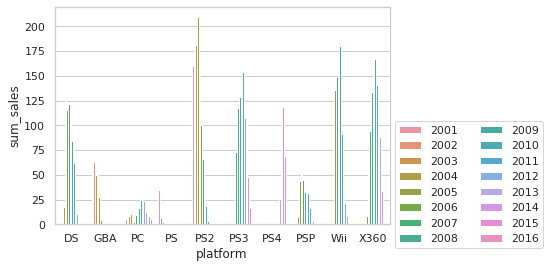

In [90]:
# определеям самые пополярные платоформы за все время
data_platform = data_new.pivot_table(index = ['platform'], aggfunc = {'sum_sales' : 'sum'}) \
                        .reset_index().rename_axis(None, axis=1)

display(data_platform.sort_values(by = 'sum_sales', ascending=False).head(50))

top_platform = ['PS2', 'X360', 'PS3', 'Wii', 'PS', 'DS', 'PS4', 'PSP', 'GBA', 'PC'] # список 10 самых популярных платформ

data_platform_year = data.pivot_table(index = ['platform', 'year_of_release'], aggfunc = {'sum_sales' : 'sum'}) \
                        .reset_index().rename_axis(None, axis=1)
display(data_platform_year)

data_platform_group = data_platform_year.groupby('platform')['year_of_release'] \
                        .count() \
                        .reset_index(name='count_year') \
                        .sort_values(['count_year'], ascending=False) \

print('Количество лет, когда использовалась платформа')
display(data_platform_group)
print('Медианное вермя для каждой платформы', data_platform_group['count_year'].median())


data_platform_pop = data_platform_year.query('platform in @top_platform')
data_platform_pop = data_platform_pop.query('year_of_release > 2000')
sns.set(style="whitegrid")
ax = sns.barplot(x="platform", y="sum_sales", hue="year_of_release", data=data_platform_pop)
plt.legend(loc='left center', bbox_to_anchor=(1, 0.5), ncol=2)

### Вывод

Из анализа платформ можно сделать вывод, что медианное количество лет, за которое появляются и исчезают платформы составляет 7.5 лет. Данное значение подтверждает построенный график. На нем платформы появляются и исчезают в периоды от 5 до 10 лет.

Возьмите данные за соответствующий актуальный период. Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.
Не учитывайте в работе данные за предыдущие годы.
Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.

Выполним предыдущий шаг для игр за последние 7 лет с 2011 по 2016 год.

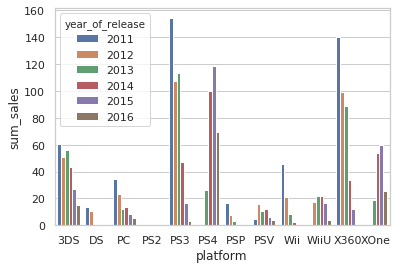

In [6]:
data_main = data.query('year_of_release >= 2011')

data_platform_year_main = data_main.pivot_table(index = ['platform', 'year_of_release'], aggfunc = {'sum_sales' : 'sum'}) \
                        .reset_index().rename_axis(None, axis=1)

sns.set(style="whitegrid")
ax = sns.barplot(x="platform", y="sum_sales", hue="year_of_release", data=data_platform_year_main)

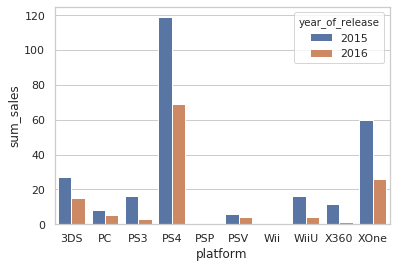

In [7]:
data_main = data.query('year_of_release >= 2015')

data_platform_year_main = data_main.pivot_table(index = ['platform', 'year_of_release'], aggfunc = {'sum_sales' : 'sum'}) \
                        .reset_index().rename_axis(None, axis=1)

sns.set(style="whitegrid")
ax = sns.barplot(x="platform", y="sum_sales", hue="year_of_release", data=data_platform_year_main)

### Вывод

Из графиков видно, что перспективными платформами на 2017 год явлются: PS4, XOne и возможно 3DS.

Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат.

/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


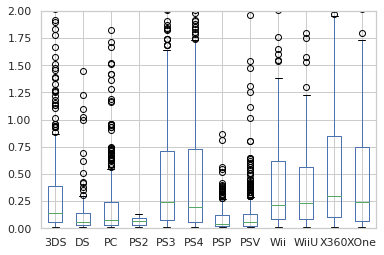

In [11]:
data_boxplot = data.query('year_of_release >= 2011')


data_boxplot_platform = data_boxplot.pivot_table(index='name', columns='platform', values='sum_sales', aggfunc='sum')
data_boxplot_platform.boxplot()
plt.ylim(0, 2)
plt.show()

### Вывод

По графику «ящик с усами» видно, что в каждой платформе, кроме PS2 присутствуют выбросы. Но данные значения нельзя считать выбросами потому, что в каждой платофрме были игры, которые становилмьс популярными и выбивались из общей массы. Поэтому обрезать данные по платформам будет не правильно, следовательно мы оставляем все как есть.

Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


Корреляция общего объема продаж игры с параметром critic_score равен 0.40589480145836687


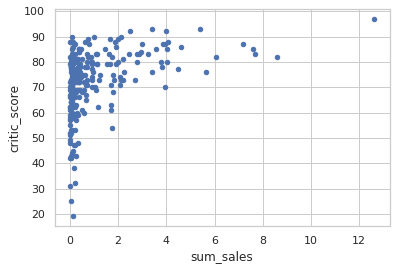

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


Корреляция общего объема продаж игры с параметром user_score равен -0.03362497596528878


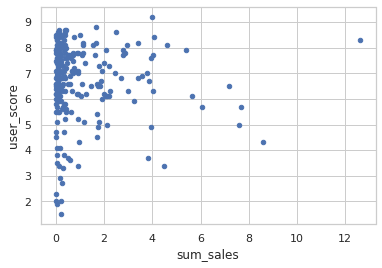

In [16]:
# Выберем популяруню платформу PS4

data_score = data.query('year_of_release >= 2011')
data_score = data_score.query('platform == "PS4"')
data_score = data_score.query('critic_score > 0') # нужно избавиться от 0 значений
data_score = data_score.query('user_score > 0')

corr_list = ['critic_score', 'user_score']

for name in corr_list:
    print('Корреляция общего объема продаж игры с параметром', name,'равен', data_score['sum_sales'].corr(data_score[name]))
    data_score.plot(x='sum_sales', y=name, kind='scatter')
    plt.show()



### Вывод

Корреляция объем продаж с оценкой критиков равна 0.40. Данное значение является высоким, следовательно можно говорить о хорошей зависимости объем продаж игры от оценки критика.

Корреляция с оценкой пользователя является отрицательной и маленькой -0.03. Следовательно для игр на PS4 нет зависомости объемов продаж от оценки пользователей.

Соотнесите выводы с продажами игр на других платформах.

In [30]:
data_2011 = data.query('year_of_release >= 2011')

data_top_platforms = data_2011.pivot_table(index = ['platform'], aggfunc = {'sum_sales' : 'sum'}) \
                        .reset_index().rename_axis(None, axis=1)
display(data_top_platforms.sort_values(by = 'sum_sales', ascending=False))
top_platform_2011 = ['PS3', 'X360', 'PS4', '3DS', 'XOne', 'PC', 'WiiU', 'Wii', 'PSV'] # список популярынх платформ

,platform,sum_sales
4,PS3,441.53
10,X360,375.18
5,PS4,314.00
0,3DS,253.24
11,XOne,158.77
2,PC,97.11
9,WiiU,81.79
8,Wii,77.56
7,PSV,53.50
6,PSP,27.54


Определили самые популярные платформы с 2011 и занесли их в список. На основе данного списка проведем анализ оценки и продаж. Сравним с коэффицентами корреляции для платформы PS4.

In [29]:
top_platform_2011_cor = ['PS3', 'X360', '3DS', 'XOne', 'PC', 'WiiU', 'Wii', 'PSV'] # список популярынх платформ без PS4

for name in top_platform_2011_cor:
    print('')
    data_corr = data_2011 # обнуление массива в каждом новом цикле
    data_corr = data_2011.query('platform == @name')
    data_corr = data_corr.query('critic_score > 0') # нужно избавиться от 0 значений
    data_corr = data_corr.query('user_score > 0')
    corr_list = ['critic_score', 'user_score']
    for core in corr_list:
        print('Корреляция общего объема продаж игры на плафторме', name,'с параметром', core,'равен', data_corr['sum_sales'].corr(data_corr[core]))



Корреляция общего объема продаж игры на плафторме PS3 с параметром critic_score равен 0.3762850329134494
Корреляция общего объема продаж игры на плафторме PS3 с параметром user_score равен 0.025188713843039043

Корреляция общего объема продаж игры на плафторме X360 с параметром critic_score равен 0.39039696950102515
Корреляция общего объема продаж игры на плафторме X360 с параметром user_score равен 0.024110542685083735

Корреляция общего объема продаж игры на плафторме 3DS с параметром critic_score равен 0.3389038644633216
Корреляция общего объема продаж игры на плафторме 3DS с параметром user_score равен 0.2320887223766356

Корреляция общего объема продаж игры на плафторме XOne с параметром critic_score равен 0.4104220356129637
Корреляция общего объема продаж игры на плафторме XOne с параметром user_score равен -0.09400318326920852

Корреляция общего объема продаж игры на плафторме PC с параметром critic_score равен 0.3135263265669808
Корреляция общего объема продаж игры на плафторм

### Вывод

Коэффиценты корреляции с оценкой критика:
- для самых популярных платофрм коэффиценты корреляции примерно одинаковые и все явлюются сильными. Разброс коэффицентов от 0.31 до 0.41. Сравнивая с платформой PS4 можно сказать, что выводы схожи и мы наблюдаем хорошую зависимость объемов продаж игры от оценки критика
- для меннее популярынх платформ Wii и PSV коэффицент значительно ниже 0.25 и 0.13 соответсвенно. В данном случае зависимость не значительная

Коэффиценты корреляции с оценкой пользователя:
- для самых популярных платофрм коэффиценты корреляции сильно разняться от 0.39 у WiiU до -0.09 у XOne. Определенной закономерности выявить не удалось. Скорее всего много игр выходят с большим ожиданием, что говорит о больших продажах, но пользователь ожидал от игры большего и следовательно ставит низкую оценку. Для платформы PS4 ситуация идентична.
- для некоторых платформ корреляция является достаточно сильной, что указывает на зависмость между объемом продаж и оценкой пользователя, примером служит платформа WiiU с коэффицентом 0.39

Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

In [37]:
data_top_genres = data_2011.pivot_table(index = ['genre'], aggfunc = {'sum_sales' : 'sum'}) \
                        .reset_index().rename_axis(None, axis=1)
display(data_top_genres.sort_values(by = 'sum_sales', ascending=False))

min_sales = data_2011['sum_sales'].min()
print('Минимальные продажи для игр равны', min_sales)
data_min_genres = data_2011.query('sum_sales == @min_sales')
display(data_min_genres['genre'].value_counts())

print('Топ 5 продаваемых игр и их жанры')

display(data_2011.sort_values(by = 'sum_sales', ascending=False).head(10))

,genre,sum_sales
0,Action,546.15
8,Shooter,402.27
7,Role-Playing,245.63
10,Sports,229.89
3,Misc,119.88
4,Platform,87.71
6,Racing,86.20
2,Fighting,66.78
9,Simulation,47.16
1,Adventure,43.24


Минимальные продажи для игр равны 0.01


Action          83
Adventure       65
Misc            16
Sports          14
Strategy        13
Racing          12
Role-Playing    11
Simulation      10
Shooter          6
Puzzle           5
Platform         4
Fighting         4
Name: genre, dtype: int64

Топ 5 продаваемых игр и их жанры


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97,8.1,M,16.27
29,Call of Duty: Modern Warfare 3,X360,2011,Shooter,9.04,4.24,0.13,1.32,88,3.4,M,14.73
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,0,0.0,0,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,0,0.0,0,14.60
34,Call of Duty: Black Ops II,PS3,2012,Shooter,4.99,5.73,0.65,2.42,83,5.3,M,13.79
35,Call of Duty: Black Ops II,X360,2012,Shooter,8.25,4.24,0.07,1.12,83,4.8,M,13.68
37,Call of Duty: Modern Warfare 3,PS3,2011,Shooter,5.54,5.73,0.49,1.57,88,3.2,M,13.33
40,Mario Kart 7,3DS,2011,Racing,5.03,4.02,2.69,0.91,85,8.2,E,12.65
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97,8.3,M,12.62


### Вывод

Жанр Action является уникальным жанром так, как он занимает три из десяти строчек в списке самых продаваемых игр. Но так же, он находится на первом месте по количеству игр с минимальными продажами, количество игр равно 83. Стоит заметить, что все строчки списка самых продаваемых игр принесла одна единственная игра Grand Theft Auto V.

Жанр Shooter тоже находится в списке самых продаваемых игр - пять из десяти строчек, но количество игр с минимальными продажами у него ниже, всего 6 игр.

Так же в список самых продаваемых игр попали жанры: Role-Playing и Racing по одной строчки каждый.

### Шаг 4. Составьте портрет пользователя каждого региона <a id="step4"></a>  

Определите для пользователя каждого региона (NA, EU, JP):
Самые популярные платформы (топ-5). Опишите различия в долях продаж.

In [38]:
data_user_group = data_2011.pivot_table(index = ['platform', 'na_sales', 'eu_sales', 'jp_sales', 'other_sales'], values = 'sum_sales', aggfunc = 'sum') \
                        .reset_index().rename_axis(None, axis=1)
display(data_user_group)

# Функция, которая на основе индексов таблицы высчитывает сумму значений столбца %sales
def sum_top_5(data, indexes):
    top_5 = 0
    for i in indexes:
        top_5 = top_5 + data.loc[i]['%sales']
    return top_5

# вычисление самых популярнях платформ для региона NA
data_user_group_na = data_user_group.groupby('platform')['na_sales'] \
                                    .sum() \
                                    .reset_index(name='na_sales') \
                                    .sort_values(['na_sales'], ascending=False) \

all_sum_na = data_user_group_na['na_sales'].sum()

data_user_group_na['%sales'] = data_user_group_na['na_sales']/all_sum_na
display(data_user_group_na.head(5))
print('Общее количество продаж в регионе NA равно {:.2f}'.format(all_sum_na))
indexes = [10, 4, 5, 11, 0]
print('Процент продаж приходящейся на топ 5 платформ {:.2f}'.format(sum_top_5(data_user_group_na, indexes)*100))

# вычисление самых популярнях платформ для региона EU
data_user_group_eu = data_user_group.groupby('platform')['eu_sales'] \
                                    .sum() \
                                    .reset_index(name='eu_sales') \
                                    .sort_values(['eu_sales'], ascending=False) \
                                    
all_sum_eu = data_user_group_eu['eu_sales'].sum()

data_user_group_eu['%sales'] = data_user_group_eu['eu_sales']/all_sum_eu
display(data_user_group_eu.head(5))
print('Общее количество продаж в регионе EU равно {:.2f}'.format(all_sum_eu))
indexes = [4, 5, 10, 0, 2]
print('Процент продаж приходящейся на топ 5 платформ {:.2f}'.format(sum_top_5(data_user_group_eu, indexes)*100))

# вычисление самых популярнях платформ для региона JP и их процент
data_user_group_jp = data_user_group.groupby('platform')['jp_sales'] \
                                    .sum() \
                                    .reset_index(name='jp_sales') \
                                    .sort_values(['jp_sales'], ascending=False) \

all_sum_jp = data_user_group_jp['jp_sales'].sum()

data_user_group_jp['%sales'] = data_user_group_jp['jp_sales']/all_sum_jp
display(data_user_group_jp.head(5))
print('Общее количество продаж в регионе JP равно {:.2f}'.format(all_sum_jp))
indexes = [0, 4, 5, 9, 7]
print('Процент продаж приходящейся на топ 5 платформ {:.2f}'.format(sum_top_5(data_user_group_jp, indexes)*100))

# вычисление самых популярнях платформ во всем мире
data_user_group_all = data_user.pivot_table(index = ['platform'], values = 'sum_sales', aggfunc = 'sum') \
                        .reset_index().rename_axis(None, axis=1)
display(data_user_group_all.sort_values(['sum_sales'], ascending=False).head(5))


,platform,na_sales,eu_sales,jp_sales,other_sales,sum_sales
0,3DS,0.00,0.00,0.01,0.00,0.13
1,3DS,0.00,0.00,0.02,0.00,0.26
2,3DS,0.00,0.00,0.03,0.00,0.75
3,3DS,0.00,0.00,0.04,0.00,0.64
4,3DS,0.00,0.00,0.05,0.00,0.60
...,...,...,...,...,...,...
2322,XOne,2.61,0.33,0.00,0.34,3.28
2323,XOne,2.78,1.27,0.03,0.41,4.49
2324,XOne,2.81,2.19,0.00,0.47,5.47
2325,XOne,3.22,1.55,0.01,0.48,5.26


,platform,na_sales,%sales
10,X360,218.68,0.277291
4,PS3,165.15,0.209414
5,PS4,107.65,0.136503
11,XOne,90.70,0.115010
0,3DS,79.24,0.100478


Общее количество продаж в регионе NA равно 788.63
Процент продаж приходящейся на топ 5 платформ 83.87


,platform,eu_sales,%sales
4,PS3,160.74,0.250479
5,PS4,139.44,0.217288
10,X360,113.91,0.177505
0,3DS,59.34,0.092469
2,PC,50.72,0.079036


Общее количество продаж в регионе EU равно 641.73
Процент продаж приходящейся на топ 5 платформ 81.68


,platform,jp_sales,%sales
0,3DS,87.90,0.450677
4,PS3,39.67,0.203394
5,PS4,14.37,0.073677
9,WiiU,12.90,0.066140
7,PSV,11.64,0.059680


Общее количество продаж в регионе JP равно 195.04
Процент продаж приходящейся на топ 5 платформ 85.36


,platform,sum_sales
4,PS3,441.53
10,X360,375.18
5,PS4,314.00
0,3DS,253.24
11,XOne,158.77


### Вывод

Для региона NA самыми популярынми платформами являются: X360, PS3, PS4, XOne и 3DS.
Общий процент продаж на эти платформы составляет 83.87%
Доли продаж у первых двух платформ примерно одинаковы и явлются основными.

Для региона EU самыми популярынми платформами являются: PS3, PS4, X360, 3DS и PC.
Общий процент продаж на эти платформы составляет 81.68%
Доли продаж у первых трех платформ примерно одинаковы и явлются основными.

Для региона JP самыми популярынми платформами являются: 3DS, PS3, PS4, WiiU и PSV.
Общий процент продаж на эти платформы составляет 85.36%
Большой отрыв от всех платформ показывает 3DS платформа, целых 45%, почти половина всех продаж.

Самые популярные жанры (топ-5). Поясните разницу.

In [71]:
data_genre_group = data_2011.pivot_table(index = ['genre', 'na_sales', 'eu_sales', 'jp_sales'], values = 'name', aggfunc = 'count') \
                        .reset_index().rename_axis(None, axis=1)
display(data_genre_group)

# вычисление самых популярнях жанров для региона NA
data_genre_group_na = data_genre_group.query('na_sales > 0') # учитываем только те жанры по которым были хоть какие-то продаже в регионе
data_genre_group_na_final = data_genre_group_na.groupby('genre')['na_sales'] \
                                    .count() \
                                    .reset_index(name='na_sales') \
                                    .sort_values(['na_sales'], ascending=False) \

display(data_genre_group_na_final.head(5))


# вычисление самых популярнях жанров для региона EU
data_genre_group_eu = data_genre_group.query('eu_sales > 0')
data_genre_group_eu_final = data_genre_group_eu.groupby('genre')['eu_sales'] \
                                    .count() \
                                    .reset_index(name='eu_sales') \
                                    .sort_values(['eu_sales'], ascending=False) \

display(data_genre_group_eu_final.head(5))

# вычисление самых популярнях жанров для региона JP
data_genre_group_jp = data_genre_group.query('jp_sales > 0')
data_genre_group_jp_final = data_genre_group_jp.groupby('genre')['jp_sales'] \
                                    .count() \
                                    .reset_index(name='jp_sales') \
                                    .sort_values(['jp_sales'], ascending=False) \

display(data_genre_group_jp_final.head(5))

# вычисление самых популярнях платформ во всем мире
data_genre_group_all = data_2011.pivot_table(index = ['genre'], values = 'sum_sales', aggfunc = 'sum') \
                        .reset_index().rename_axis(None, axis=1)
display(data_genre_group_all.sort_values(['sum_sales'], ascending=False).head(5))

,genre,na_sales,eu_sales,jp_sales,name
0,Action,0.00,0.00,0.01,40
1,Action,0.00,0.00,0.02,74
2,Action,0.00,0.00,0.03,39
3,Action,0.00,0.00,0.04,28
4,Action,0.00,0.00,0.05,18
...,...,...,...,...,...
2306,Strategy,0.36,0.21,0.00,1
2307,Strategy,0.44,0.32,0.29,1
2308,Strategy,0.83,0.66,0.00,1
2309,Strategy,0.90,0.12,0.00,1


,genre,na_sales
0,Action,573
8,Shooter,266
7,Role-Playing,224
10,Sports,222
3,Misc,130


,genre,eu_sales
0,Action,575
8,Shooter,267
10,Sports,214
7,Role-Playing,213
3,Misc,127


,genre,jp_sales
0,Action,322
7,Role-Playing,215
8,Shooter,126
2,Fighting,90
10,Sports,78


,genre,sum_sales
0,Action,546.15
8,Shooter,402.27
7,Role-Playing,245.63
10,Sports,229.89
3,Misc,119.88


### Вывод

Самым популярным жанром во всех регионах является жанр Action, он везде занимает лидирующую позицию. И у него очень большой отрыв в регионах NA и EU от второго места 215% в обоих случаях.

Регион JP снова отличился - Action не так сильно в лидерах, только на 149% больше. И добавился жанр Fighting вместо жанра Misc. Так же видно, что жанр Sports сильно сдал позиции для данного региона.

Влияет ли рейтинг ESRB на продажи в отдельном регионе?

In [50]:
data_rating_group = data_2011.pivot_table(index = ['name', 'rating', 'na_sales', 'eu_sales', 'jp_sales'], values = 'sum_sales', aggfunc = 'sum') \
                        .reset_index().rename_axis(None, axis=1)
display(data_rating_group)

# вычисление продаж и рейтинаг ESRB для региона NA
data_rating_group_na = data_rating_group.query('rating != 0') # не учитываем рейтинг равный 0
data_rating_group_na_final = data_rating_group_na.groupby('rating')['na_sales'] \
                                    .sum() \
                                    .reset_index(name='na_sales') \
                                    .sort_values(['na_sales'], ascending=False) \

display(data_rating_group_na_final)

# вычисление продаж и рейтинаг ESRB для региона EU
data_rating_group_eu = data_rating_group.query('rating != 0') # не учитываем рейтинг равный 0
data_rating_group_eu_final = data_rating_group_eu.groupby('rating')['eu_sales'] \
                                    .sum() \
                                    .reset_index(name='eu_sales') \
                                    .sort_values(['eu_sales'], ascending=False) \

display(data_rating_group_eu_final)

# вычисление продаж и рейтинаг ESRB для региона JP
data_rating_group_jp = data_rating_group.query('rating != 0') # не учитываем рейтинг равный 0
data_rating_group_jp_final = data_rating_group_jp.groupby('rating')['jp_sales'] \
                                    .sum() \
                                    .reset_index(name='jp_sales') \
                                    .sort_values(['jp_sales'], ascending=False) \

display(data_rating_group_jp_final)

,name,rating,na_sales,eu_sales,jp_sales,sum_sales
0,Beyblade Burst,0,0.00,0.00,0.03,0.03
1,Fire Emblem Fates,0,0.81,0.23,0.52,1.67
2,Frozen: Olaf's Quest,0,0.21,0.26,0.00,0.51
3,Frozen: Olaf's Quest,0,0.27,0.27,0.00,0.59
4,Haikyu!! Cross Team Match!,0,0.00,0.00,0.04,0.04
...,...,...,...,...,...,...
3628,de Blob 2,E10+,0.11,0.07,0.00,0.21
3629,htoL#NiQ: The Firefly Diary,T,0.00,0.00,0.01,0.01
3630,inFAMOUS 2,T,1.05,0.47,0.08,1.82
3631,inFAMOUS: Second Son,T,1.28,0.98,0.07,2.79


,rating,na_sales
2,M,308.23
0,E,155.22
1,E10+,108.76
4,T,104.53
3,RP,0.00


,rating,eu_sales
2,M,250.23
0,E,135.26
4,T,81.10
1,E10+,72.89
3,RP,0.03


,rating,jp_sales
0,E,36.32
4,T,32.92
2,M,26.13
1,E10+,11.10
3,RP,0.00


### Вывод

В регионах NA и EU большинство продаж уделяется играм с рейтингами M, E. И почти нет продаж в играх с рейтингом RP.

В регионе JP отличается тем, что самые продоваемые игры - этто игры с рейтингом E, а потом T. Видим, что градация продаж по рейтингу в регионе JP отличается от регионов NA и EU.

### Шаг 5. Проверка гипотез <a id="step5"></a>  

Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

Первым делом проверим распределение значений из столбца user_score для двух платформ на нормальность с помощью теста Шапиро-Уилка.

Нулевая гипотеза H0 теста Шапиро–Уилка заключается в том, что случайная величина, выборка x которой известна, распределена по нормальному закону. Альтернативная гипотеза H1 заключается в том, закон распределения не является нормальным.

In [66]:
data_XOne_rating = data_2011.query('platform == "XOne"')
data_XOne_rating = data_XOne_rating.query('user_score > 0')
XOne_rating = data_XOne_rating['user_score'] 

data_PC_rating = data_2011.query('platform == "PC"')
data_PC_rating = data_PC_rating.query('user_score > 0')
PC_rating = data_PC_rating['user_score']

# проверяем нормальность распределения тестом Шапиро–Уилка
shapiro_stat_1, shapiro_p_1 = st.shapiro(XOne_rating)
shapiro_stat_2, shapiro_p_2 = st.shapiro(PC_rating)
alpha = .05

if shapiro_p_1 < alpha and shapiro_p_2 < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")  

Отвергаем нулевую гипотезу


### Вывод

После проверки гипотезы стало понятно, что наша гипотеза отвергнута и как следствие оба распределения являются не нормальнымы.

Сформируем следующую гипотезу.

Наша нулевая гипотеза H0 - пользовательские рейтинги платформ Xbox One и PC одинаковые. Альтернативная гипотеза H1 - пользовательские рейтинги платформ Xbox One и PC различаются.

Так как распредление не нормальное, то проверим гипотезу с помощью критерия Манна-Уитни.

In [67]:
u_alpha = .01
u_results = st.mannwhitneyu(XOne_rating, PC_rating, alternative = 'two-sided') # используем критерий Манна Уитни для не нормального распределения
print('p-значение: {:.10f}'.format(u_results.pvalue))
if u_results.pvalue < u_alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")


p-значение: 0.8414826595
Не получилось отвергнуть нулевую гипотезу


### Вывод

После проверки не получилось отвергнуить наша гипотеза отвергнута и следовательно можно сказать, что гипотеза верна, а именно: пользовательские рейтинги платформ Xbox One и PC одинаковые.

Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

Первым делом проверим распределение значений из столбца user_score для жанров Action и Sports на нормальность с помощью теста Шапиро-Уилка.

Нулевая гипотеза H0 теста Шапиро–Уилка заключается в том, что случайная величина, выборка x которой известна, распределена по нормальному закону. Альтернативная гипотеза H1 заключается в том, закон распределения не является нормальным.

In [68]:
data_action_rating = data_2011.query('genre == "Action"')
data_action_rating = data_action_rating.query('user_score > 0')
action_rating = data_action_rating['user_score'] 

data_sports_rating = data_2011.query('genre == "Sports"')
data_sports_rating = data_sports_rating.query('user_score > 0')
sports_rating = data_sports_rating['user_score']

# проверяем нормальность распределения тестом Шапиро–Уилка
shapiro_stat_1, shapiro_p_1 = st.shapiro(action_rating)
shapiro_stat_2, shapiro_p_2 = st.shapiro(sports_rating)
alpha = .05

if shapiro_p_1 < alpha and shapiro_p_2 < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")  

Отвергаем нулевую гипотезу


### Вывод

После проверки гипотезы стало понятно, что наша гипотеза отвергнута и как следствие оба распределения являются не нормальнымы.

Идем дальше, сформируем новую гипотезу.

Наша нулевая гипотеза H0 - средние пользовательские рейтинги жанров Action и Sports одинаковые. Альтернативная гипотеза H1 - средние пользовательские рейтинги жанров Action и Sports различные.

Так распредление не нормальное, то проверим гипотезу с помощью критерия Манна-Уитни.

In [69]:
u_alpha = .01
u_results = st.mannwhitneyu(action_rating, sports_rating, alternative = 'two-sided') # используем критерий Манна Уитни для не нормального распределения
print('p-значение: {:.10f}'.format(u_results.pvalue))
if u_results.pvalue < u_alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.0000000000
Отвергаем нулевую гипотезу


### Вывод

После проверки гипотезы мы ее отвергли и следовательно используем альтернативную гипотезу, а именно: средние пользовательские рейтинги жанров Action и Sports различные.

### Шаг 6. Общий вывод <a id="step6"></a>  

In [83]:
platform_list = ['PS3', 'X360', 'PS4', '3DS', 'XOne', 'PC', 'WiiU', 'Wii', 'PSV']

for name in platform_list:
    #print('')
    data_platform_year = data # обнуление массива в каждом новом цикле
    data_platform_year = data.query('platform == @name')
    data_platform_year = data_platform_year.query('year_of_release > 0')
    platform_year = data_platform_year['year_of_release'].min()
    print('Год выпуска первой игры на платформе', name,'равен', platform_year)

print('')    
# вычисление количество игр для популярнях жанров во всем мире
data_genre_count_all = data_2011.pivot_table(index = ['genre'], values = 'name', aggfunc = 'count') \
                        .reset_index().rename_axis(None, axis=1)
display(data_genre_count_all.sort_values(['name'], ascending=False)) 

# вычисление самых популярнях платформ во всем мире
data_genre_group_all = data_2011.pivot_table(index = ['genre'], values = 'sum_sales', aggfunc = 'sum') \
                        .reset_index().rename_axis(None, axis=1)
display(data_genre_group_all.sort_values(['sum_sales'], ascending=False))  

data_genre_all = data_genre_count_all.merge(data_genre_group_all, on = 'genre', how = 'outer')
data_genre_all['mean_sum'] = data_genre_all['sum_sales']/data_genre_all['name']
display(data_genre_all.sort_values(['mean_sum'], ascending=False))

Год выпуска первой игры на платформе PS3 равен 2006
Год выпуска первой игры на платформе X360 равен 2005
Год выпуска первой игры на платформе PS4 равен 2013
Год выпуска первой игры на платформе 3DS равен 2011
Год выпуска первой игры на платформе XOne равен 2013
Год выпуска первой игры на платформе PC равен 1985
Год выпуска первой игры на платформе WiiU равен 2012
Год выпуска первой игры на платформе Wii равен 2006
Год выпуска первой игры на платформе PSV равен 2011



,genre,name
0,Action,1188
7,Role-Playing,465
1,Adventure,388
10,Sports,340
8,Shooter,316
3,Misc,279
6,Racing,160
2,Fighting,156
11,Strategy,116
9,Simulation,112


,genre,sum_sales
0,Action,546.15
8,Shooter,402.27
7,Role-Playing,245.63
10,Sports,229.89
3,Misc,119.88
4,Platform,87.71
6,Racing,86.20
2,Fighting,66.78
9,Simulation,47.16
1,Adventure,43.24


,genre,name,sum_sales,mean_sum
8,Shooter,316,402.27,1.273006
4,Platform,110,87.71,0.797364
10,Sports,340,229.89,0.676147
6,Racing,160,86.20,0.538750
7,Role-Playing,465,245.63,0.528237
0,Action,1188,546.15,0.459722
3,Misc,279,119.88,0.429677
2,Fighting,156,66.78,0.428077
9,Simulation,112,47.16,0.421071
5,Puzzle,43,8.36,0.194419


### Вывод

После анализа данных мы определили:
- медианное количество лет существования платформы равно 7.5, ислючением является платформа PC, которая была запущена в 1985 году и до сих пор находится в списке популярных платформ
- для анализа использовали данные с 2011 года
- самые популярные платформы: 'PS3', 'X360', 'PS4', '3DS', 'XOne', 'PC', 'WiiU', 'Wii', 'PSV', платформы PS3, X360, 3DS, PC, Wii, PSV были выпущены в 2011 году или раньше, поэтому являются малоперспективными
- с помощью детализации продаж по платформам за 2015 и 2016 было выявлено, что преспективными платформами являются XOne и PS4, данные платформы были выпущены в 2013 году и являются самыми новыми, что так же подтверждает их актуальность
- суммарные продажи по миру платформы PS4 больше на 197%, чем у платформы XOne 314 против 158.7
- платформа PS4 представелна во всех регионах, а XOne только в регионах XOne и Others
- больше всего продаж собирают игры с жанром Action и Shooter
- средние продажи на игру жанра Shooter на 277% больше, чем для жанра Action 1.273 против 0.459 соответственно
- топ 3 жанров по средним продажам за игру являются: Shooter, Platform и Sports со значениями 1.273, 0.797 и 0.676


Если игра планируется выпускаться только на регион JP однозначно нужно пересмотреть выбор жанра и платформы. Так как в ходе анализа были обнаружены явные отличия региона JP от всего мира.

Подводя итоги можно сказать, что хорошую игру на платформе PS4 и с жанром Shooter определенно ждет успех.